In [12]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

We chose task number 1. To analzye and predcit how a stock is going to change we need to use regression analysis. Regression analysis is designed to predict numeral outcomes, therefore making it suitable for this case.

We did show the confusion matrix, even though it doesnt really fit a regression problem.

Mean Absolute Error: 10.45
R-squared Score: -0.01


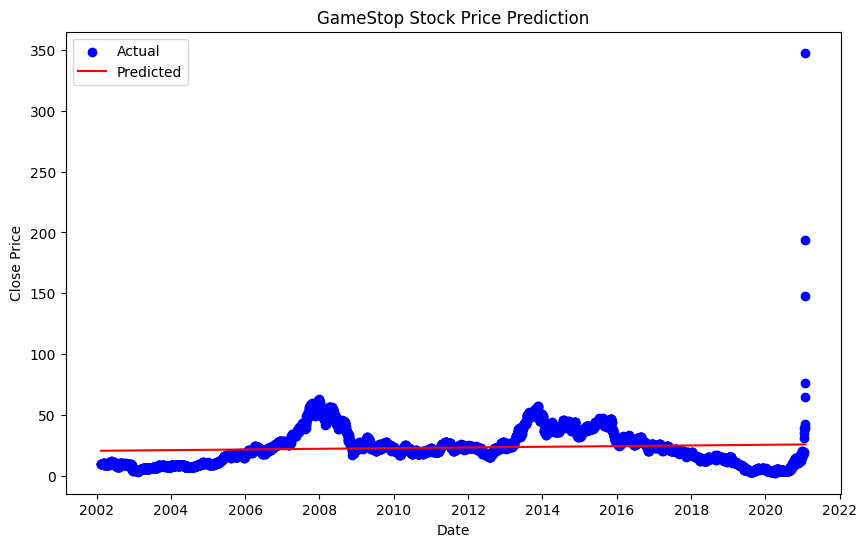

Predicted GME stock price on 2020-04-08: $25.80
Confusion Matrix:
 [[172 324]
 [  0 459]]


/Users/elonasofie/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:

# Load and prepare data
data = pd.read_csv('GME_stock.csv')
data['date'] = pd.to_datetime(data['date'])
data['Date_ordinal'] = data['date'].map(pd.Timestamp.toordinal)

# Sort data by date
data_sorted = data.sort_values('date').copy()

# Define features and target
X = data[['Date_ordinal']]
y = data['close_price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Predict close price for all dates for plotting
data_sorted['Predicted_Close'] = model.predict(data_sorted[['Date_ordinal']])

# Plot results
plt.figure(figsize=(10,6))
plt.scatter(data_sorted['date'], data_sorted['close_price'], color='blue', label='Actual')
plt.plot(data_sorted['date'], data_sorted['Predicted_Close'], color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('GameStop Stock Price Prediction')
plt.legend()
plt.show()

# Function to predict price on a specific date
def predict_price(date):
    date = pd.to_datetime(date)
    date_ordinal = date.toordinal()
    predicted_price = model.predict([[date_ordinal]])[0]
    return predicted_price

# Example usage
prediction_date = '2020-04-08'
predicted_price = predict_price(prediction_date)
print(f"Predicted GME stock price on {prediction_date}: ${predicted_price:.2f}")

# Confusion Matrix. This is meant for classification, but we have it here anyways for completeness for the oblig.
# Convert regression output to classification for confusion matrix
threshold = y.median()
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)
cm = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix:\n", cm)
